In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd
from datetime import datetime, timedelta

In [4]:
#1
df = pd.read_csv("ps4_seaLevel.csv", delimiter=',')
df

,year,sea_level
0,1921.7917,7033.0
1,1921.8750,6939.0
2,1921.9583,6893.0
3,1922.0417,6768.0
4,1922.1250,6853.0
...,...,...
1223,2023.7083,7395.0
1224,2023.7917,7477.0
1225,2023.8750,7424.0
1226,2023.9583,7263.0


In [7]:
data = df.to_numpy()
sea_lvl = data[0:-1,1]

print(sea_lvl)

[7033. 6939. 6893. ... 7477. 7424. 7263.]


In [9]:
years = data[0:-1,0]
start_date = datetime(1921, 1, 1)

#Converting decimal numbers to dates
def decimal_year_to_date(years):
    year = int(years)  #years
    fraction = years - year  #fractions of years
    days_in_year = 365
    day_of_year = int(fraction * days_in_year) + 1  #days
    
    date = datetime(year, 1, 1) + timedelta(days=day_of_year - 1)
    return date

#Converting array into dates
dates = [decimal_year_to_date(year) for year in years]


#for year, date in zip(years, dates):
   # print(f"{year} -> {date.date()}")
#len(dates)
for date in dates:
    print(date.strftime('%m/%d/%Y'))

10/16/1921
11/16/1921
12/16/1921
01/16/1922
02/15/1922
03/18/1922
04/17/1922
05/17/1922
06/17/1922
07/17/1922
08/17/1922
09/16/1922
10/16/1922
11/16/1922
12/16/1922
01/16/1923
02/15/1923
03/18/1923
04/17/1923
05/17/1923
06/17/1923
07/17/1923
08/17/1923
09/16/1923
10/16/1923
11/16/1923
12/16/1923
01/16/1924
02/15/1924
03/17/1924
04/16/1924
05/16/1924
06/16/1924
07/16/1924
08/16/1924
09/15/1924
10/15/1924
11/15/1924
12/15/1924
01/16/1925
02/15/1925
03/18/1925
04/17/1925
05/17/1925
06/17/1925
07/17/1925
08/17/1925
09/16/1925
10/16/1925
11/16/1925
12/16/1925
01/16/1926
02/15/1926
03/18/1926
04/17/1926
05/17/1926
06/17/1926
07/17/1926
08/17/1926
09/16/1926
10/16/1926
11/16/1926
12/16/1926
01/16/1927
02/15/1927
03/18/1927
04/17/1927
05/17/1927
06/17/1927
07/17/1927
08/17/1927
09/16/1927
10/16/1927
11/16/1927
12/16/1927
01/16/1928
02/15/1928
03/17/1928
04/16/1928
05/16/1928
06/16/1928
07/16/1928
08/16/1928
09/15/1928
10/15/1928
11/15/1928
12/15/1928
01/16/1929
02/15/1929
03/18/1929
04/17/1929

In [10]:
#2
df = pd.DataFrame({'Sea Level': sea_lvl}, index=pd.to_datetime(dates))
df.index.name = 'Date'
df

,Sea Level
Date,
1921-10-16,7033.0
1921-11-16,6939.0
1921-12-16,6893.0
1922-01-16,6768.0
1922-02-15,6853.0
...,...
2023-08-17,7265.0
2023-09-16,7395.0
2023-10-16,7477.0


Text(0.5, 1.0, 'Sea Levels of Charleston, SC (1921-2023)')

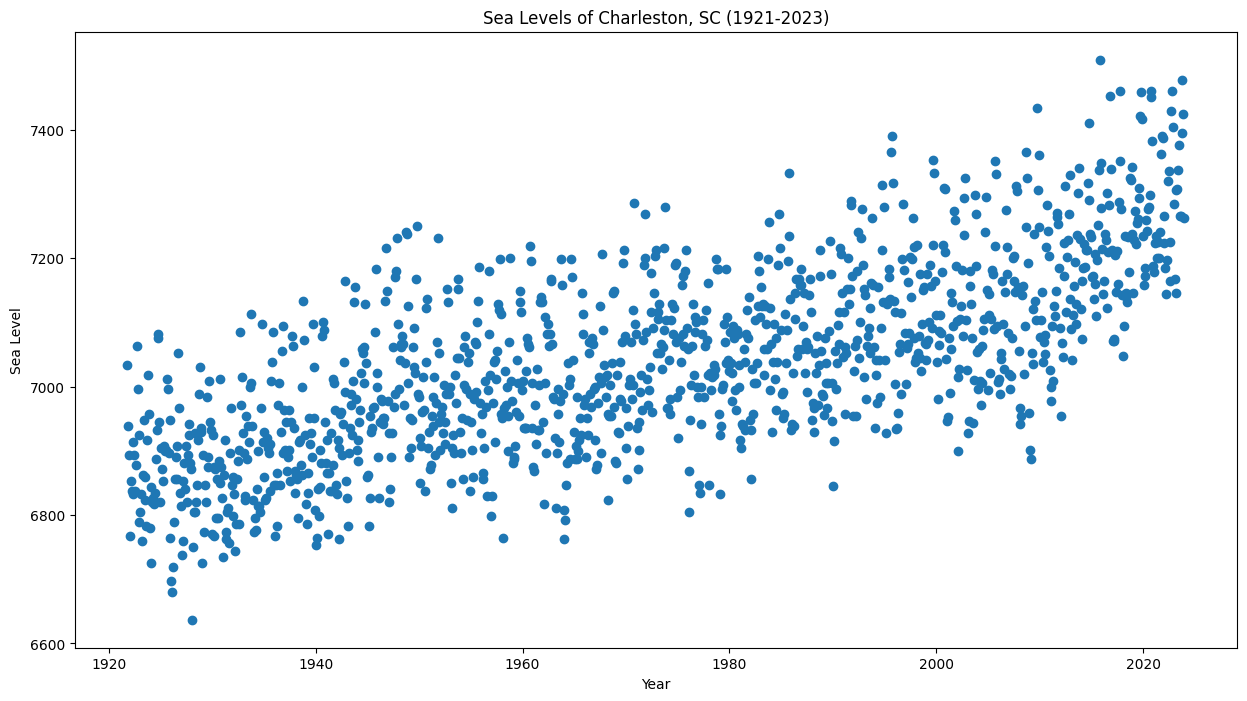

In [11]:
plt.figure(figsize=(15, 8))
plt.scatter(df.index, df['Sea Level'], marker='o')
plt.xlabel('Year')
plt.ylabel('Sea Level')
plt.title('Sea Levels of Charleston, SC (1921-2023)')

In [13]:
df = pd.DataFrame({'Sea Level': sea_lvl}, index=data[0:-1,0])
df

,Sea Level
1921.7917,7033.0
1921.8750,6939.0
1921.9583,6893.0
1922.0417,6768.0
1922.1250,6853.0
...,...
2023.6250,7265.0
2023.7083,7395.0
2023.7917,7477.0
2023.8750,7424.0


In [14]:
#3
#df['date_val'] = df.index.map(pd.Timestamp.toordinal)

#Calculating linear regression
x = np.column_stack((df.index,np.ones(len(df))))  #Creating matrix 
y = df['Sea Level'].values  #Extracting sea level values

linfit = np.matmul(np.linalg.pinv(x), y)

lin_reg = linfit[1]+(linfit[0]*years) #linear regression line

print("Slope:", linfit[0])
print("Intercept:", linfit[1])

Slope: 3.5382299200221885
Intercept: 59.66379079050661


Text(0.5, 1.0, 'Sea Levels of Charleston, SC (1921-2023)')

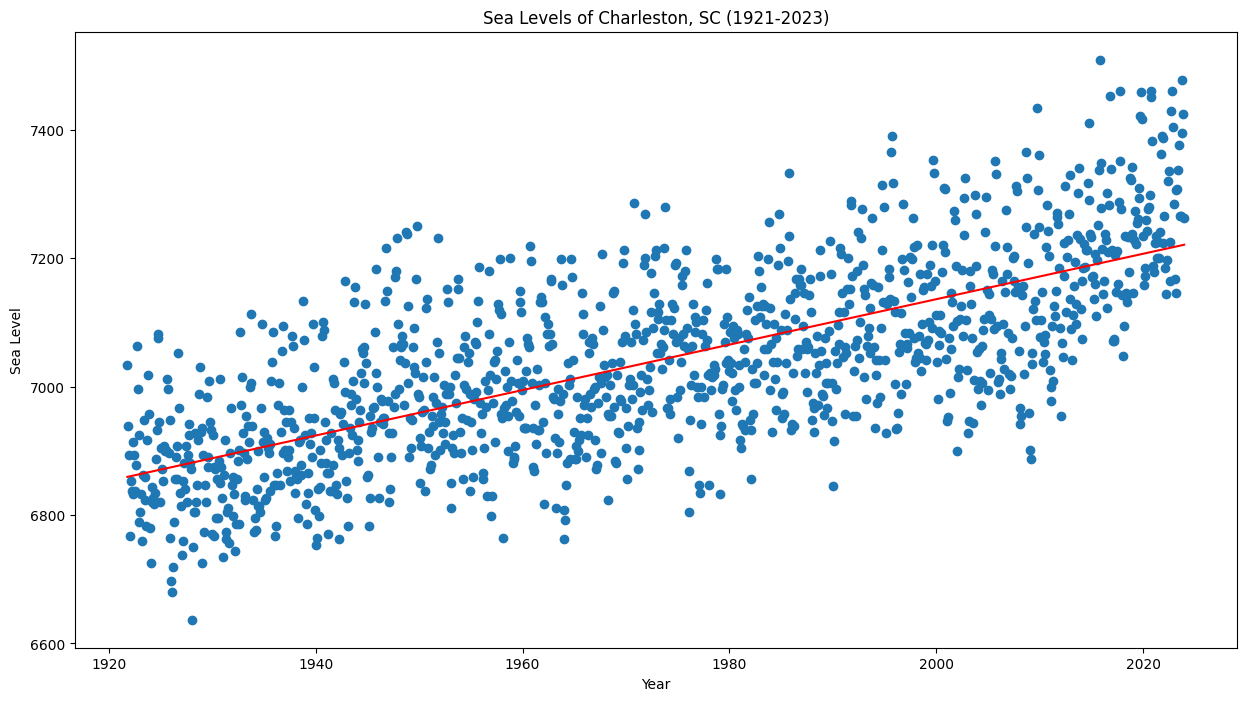

In [15]:
plt.figure(figsize=(15, 8))
plt.scatter(df.index, df['Sea Level'], marker='o') #scatter plot
plt.plot(df.index, lin_reg, 'r-') #plotting linear regression

plt.xlabel('Year')
plt.ylabel('Sea Level')
plt.title('Sea Levels of Charleston, SC (1921-2023)')

In [16]:
#4
lin_anom = y - lin_reg
var_det = np.var(lin_anom, ddof=1)

print("Anomalies:", lin_anom)
print("Variance of Detrended Data:", var_det)

Anomalies: [173.59531622  79.30058167  33.00584711 ... 256.69586438 203.40112982
  42.10639527]
Variance of Detrended Data: 10566.842134264874


In [17]:
#5
periods = [
    (1923.0, 1942.0),
    (1943.0, 1962.0),
    (1963.0, 1982.0),
    (1983.0, 2002.0),
    (2003.0, 2022.0)
]
periods

[(1923.0, 1942.0),
 (1943.0, 1962.0),
 (1963.0, 1982.0),
 (1983.0, 2002.0),
 (2003.0, 2022.0)]

In [18]:
#Function to calculate sea level rise rates
def lvl_rise_fxn(df, start_date, end_date):
    period_data = df[start_date:end_date]
    if len(period_data) < 2:  
        return None

    pyears = period_data.index.values
    py = period_data['Sea Level'].values
    px = np.column_stack((pyears,np.ones(len(pyears))))
    plinfit = np.matmul(np.linalg.pinv(px), py)
    slope = plinfit[0]
    return slope

In [19]:
#Calculate sea level rise rates for each period
rise_rates = {}
for start_date, end_date in periods:
    rate = lvl_rise_fxn(df, start_date, end_date)
    rise_rates[f'{int(start_date)}-{int(end_date)}'] = rate

for period, rate in rise_rates.items():
    if rate is not None:
        print(f'Sea level rise rate from {period}: {rate:.4f}/year (sea level units unknown)')
    else:
        print(f'Not enough data for the period {period}')

Sea level rise rate from 1923-1942: 3.5845/year (sea level units unknown)
Sea level rise rate from 1943-1962: 1.1417/year (sea level units unknown)
Sea level rise rate from 1963-1982: 4.1085/year (sea level units unknown)
Sea level rise rate from 1983-2002: 3.6502/year (sea level units unknown)
Sea level rise rate from 2003-2022: 10.9830/year (sea level units unknown)
